# HoloDemtect: Analizing the data of the HoloDemtect app tasks

In [28]:
import pandas
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.express as px

#Load the data from the CSV file separated by ;
data = pandas.read_csv('summary.csv', sep=';')


In [29]:
#Convert format of the time column %M:%S:%m (minutes:seconds:milliseconds) to a timedelta format
def str_to_timedelta(str):
    #parse by the character ':' and convert to a list
    time_list = str.split(':')
    #convert the list to a timedelta format
    time = pandas.Timedelta(minutes=int(time_list[0]), seconds=int(time_list[1]), milliseconds=int(time_list[2]))
    return time



#loop the data dataframe and charge a csv file for each task using the id of the row
for index, row in data.iterrows():
    data_type = 0  #0 Normal 1 Low Performance -1 Any
    try:
        data_time_series = pandas.read_csv('time_series/'+str(row['task_id'])+'.csv', sep=';')
    except:
        try:
            data_time_series = pandas.read_csv('time_series_low_performance/'+str(row['task_id'])+'.csv', sep=';')
            data_type = 1
        except:
            data_type = -1
            continue

    #acces the value of the variable ObjectPut of the last row and put it to the corresponding row in the data dataframe variable correct_objects
    data.loc[index, 'correct_objects'] = data_time_series['ObjectPut'].iloc[-1]

    #loop the data_time_series dataframe, starting from the second row and calculate the total time the column RightHandObject and LeftHandObject are different are not equal to "None"
    #do it using a time variable and add the time between the current row and the previous one (time variable) thha follow the format %M:%S:%m (minutes:seconds:milliseconds), save the result in seconds
    rightHandTime = pandas.Timedelta(0)
    leftHandTime = pandas.Timedelta(0)
    totalHandTime = pandas.Timedelta(0)

    for indext, rowt in data_time_series.iterrows():
        if indext > 0:
            #if not nan and not None
            if rowt['RightHandObject'] != None and not pandas.isna(rowt['RightHandObject']) and rowt['RightHandObject'] != 'None':
                #convert the format of the time column %M:%S:%m (minutes:seconds:milliseconds)
                rightHandTime += str_to_timedelta(rowt['Time']) - str_to_timedelta(data_time_series['Time'].iloc[indext-1])
            if rowt['LeftHandObject'] != None and not pandas.isna(rowt['LeftHandObject']) and rowt['LeftHandObject'] != 'None':
                leftHandTime += str_to_timedelta(rowt['Time']) - str_to_timedelta(data_time_series['Time'].iloc[indext-1])
            if ( rowt['RightHandObject'] != None and not pandas.isna(rowt['RightHandObject']) and rowt['RightHandObject'] != 'None' ) or (rowt['LeftHandObject'] != None and not pandas.isna(rowt['LeftHandObject']) and rowt['LeftHandObject'] != 'None'):
                totalHandTime += str_to_timedelta(rowt['Time']) - str_to_timedelta(data_time_series['Time'].iloc[indext-1])

    #save the result in the corresponding row in the data dataframe variable
    data.loc[index, 'right_hand_grab_time'] = rightHandTime.total_seconds()
    data.loc[index, 'left_hand_grab_time'] = leftHandTime.total_seconds()
    data.loc[index, 'time_holding'] = totalHandTime.total_seconds()
    data.loc[index, 'type'] = data_type

#Transorm the column 'time_holding' to float
data['time_holding'] = data['time_holding'].astype(float)

# Create a sub dataframe for each type of task_type value ShoppingTask, PairMatchingTask, LayTableTask
data_ShoppingTask = data[data['task_type'] == 'ShoppingTask']
data_PairMatchingTask = data[data['task_type'] == 'PairMatchingTask']
data_LayTableTask = data[data['task_type'] == 'LayTableTask']
data_ShoppingTask


,task_id,task_type,total_time,time_holding,num_errors,total_objects,visual_evaluation,eval_id,correct_objects,right_hand_grab_time,left_hand_grab_time,type
0,0,ShoppingTask,223.218994,64.984,0,5.0,NaN,1.0,5.0,17.486,47.498,0.0
3,3,ShoppingTask,98.919998,25.490,1,5.0,NaN,2.0,5.0,25.490,0.000,0.0
6,6,ShoppingTask,208.651001,14.997,2,5.0,NaN,3.0,2.0,14.497,0.500,0.0
9,10,ShoppingTask,165.238007,27.995,0,5.0,NaN,4.0,5.0,27.995,0.000,0.0
12,13,ShoppingTask,339.824005,40.043,1,5.0,NaN,5.0,5.0,40.043,0.000,0.0
13,14,ShoppingTask,123.195000,13.506,1,5.0,NaN,6.0,5.0,11.004,2.502,0.0
16,17,ShoppingTask,141.386002,27.502,3,5.0,NaN,7.0,3.0,15.003,15.500,0.0
18,19,ShoppingTask,50.887001,15.504,0,5.0,NaN,8.0,5.0,0.000,15.504,0.0
22,23,ShoppingTask,50.936001,13.995,2,5.0,NaN,9.0,5.0,13.995,0.000,0.0
23,24,ShoppingTask,303.490997,27.489,3,5.0,NaN,10.0,4.0,10.488,19.501,0.0


## Analyzing the distribution of each variable by the task type

### Shopping task

In [30]:
# Display variables total_time, num_errors and total_objects of the dataframe data_ShoppingTask
data_ShoppingTask[['total_time','time_holding','right_hand_grab_time','left_hand_grab_time', 'num_errors','correct_objects']].describe()

,total_time,time_holding,right_hand_grab_time,left_hand_grab_time,num_errors,correct_objects
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,156.576696,23.095000,14.882391,9.541739,1.478261,4.391304
std,93.898350,12.233479,9.744934,10.963339,1.533551,1.269901
min,45.888000,3.494000,0.000000,0.000000,0.000000,0.000000
25%,82.232998,15.250500,8.817000,0.000000,0.000000,4.500000
50%,141.386002,21.013000,14.003000,8.670000,1.000000,5.000000
75%,198.522003,27.495500,20.027000,15.012000,2.500000,5.000000
max,372.489014,64.984000,40.043000,47.498000,5.000000,5.000000


<Axes: ylabel='Frequency'>

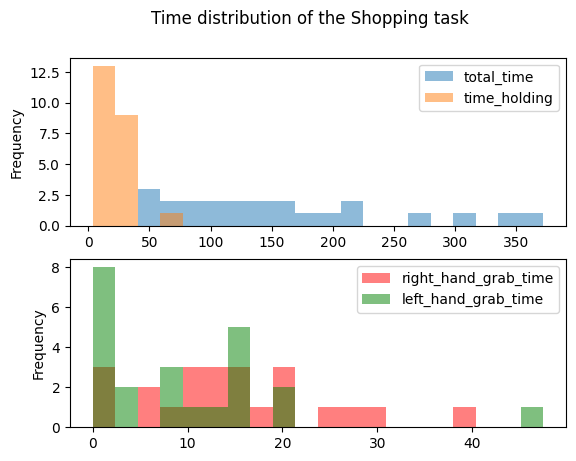

In [31]:
figure, axes = plt.subplots(nrows=2, ncols=1)
figure.suptitle('Time distribution of the Shopping task')
data_ShoppingTask[['total_time','time_holding']].plot.hist(ax=axes[0], alpha=0.5, bins=20)
data_ShoppingTask[['right_hand_grab_time','left_hand_grab_time']].plot.hist(ax=axes[1], alpha=0.5, bins=20,color=['red','green'])

### Parking task

In [32]:
# Display variables total_time, num_errors and total_objects of the dataframe data_PairMatchingTask
data_PairMatchingTask[['total_time','time_holding','right_hand_grab_time','left_hand_grab_time', 'num_errors','correct_objects']].describe()

,total_time,time_holding,right_hand_grab_time,left_hand_grab_time,num_errors,correct_objects
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,108.684696,25.028783,17.291565,10.194261,6.695652,2.739130
std,50.761022,13.066307,13.609525,11.273746,4.828276,0.540824
min,18.236000,7.001000,0.000000,0.000000,3.000000,1.000000
25%,78.484497,14.919000,6.003000,2.999000,3.000000,3.000000
50%,104.342003,21.033000,14.500000,7.003000,5.000000,3.000000
75%,129.631500,33.001500,29.002500,13.257000,9.000000,3.000000
max,271.298004,56.496000,45.704000,49.499000,21.000000,3.000000


<Axes: ylabel='Frequency'>

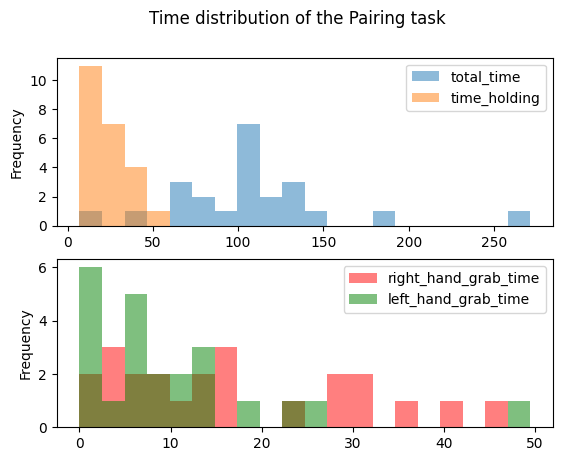

In [33]:
figure, axes = plt.subplots(nrows=2, ncols=1)
figure.suptitle('Time distribution of the Pairing task')
data_PairMatchingTask[['total_time','time_holding']].plot.hist(ax=axes[0], alpha=0.5, bins=20)
data_PairMatchingTask[['right_hand_grab_time','left_hand_grab_time']].plot.hist(ax=axes[1], alpha=0.5, bins=20,color=['red','green'])

### Lay Table Task

In [34]:
# Display variables total_time, num_errors and total_objects of the dataframe data_LayTableTask
data_LayTableTask[['total_time','time_holding','right_hand_grab_time','left_hand_grab_time', 'num_errors']].describe()

,total_time,time_holding,right_hand_grab_time,left_hand_grab_time,num_errors
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,156.492723,36.984000,25.283667,13.811778,0.833333
std,61.223946,23.543104,17.515914,14.156445,1.200490
min,43.477001,8.003000,4.000000,0.000000,0.000000
25%,109.058249,22.857750,12.367750,4.253000,0.000000
50%,145.899993,30.998000,20.253500,11.252500,0.000000
75%,196.555000,40.524250,34.882500,16.043750,1.750000
max,295.949005,114.012000,67.521000,58.500000,3.000000


<Axes: ylabel='Frequency'>

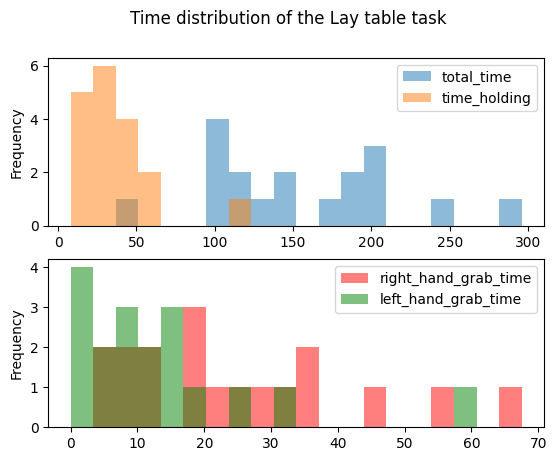

In [35]:
figure, axes = plt.subplots(nrows=2, ncols=1)
figure.suptitle('Time distribution of the Lay table task')
data_LayTableTask[['total_time','time_holding']].plot.hist(ax=axes[0], alpha=0.5, bins=20)
data_LayTableTask[['right_hand_grab_time','left_hand_grab_time']].plot.hist(ax=axes[1], alpha=0.5, bins=20,color=['red','green'])

## Correlation between variables

### Shopping task

<Axes: >

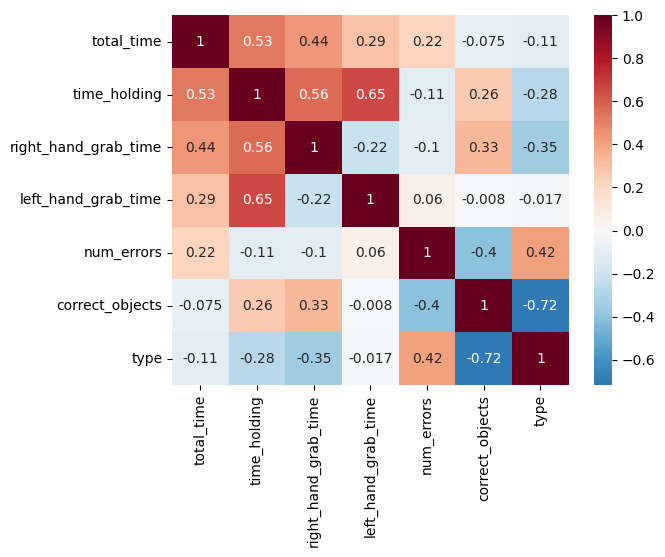

In [36]:
#Correlation heatmap of the varialbes of data_ShoppingTask
corr = data_ShoppingTask[['total_time','time_holding','right_hand_grab_time','left_hand_grab_time', 'num_errors','correct_objects','type']].corr()
sns.heatmap(corr, xticklabels=corr.columns.values,  yticklabels=corr.columns.values, cmap='RdBu_r', center=0, annot=True)


### Pairing task

<Axes: >

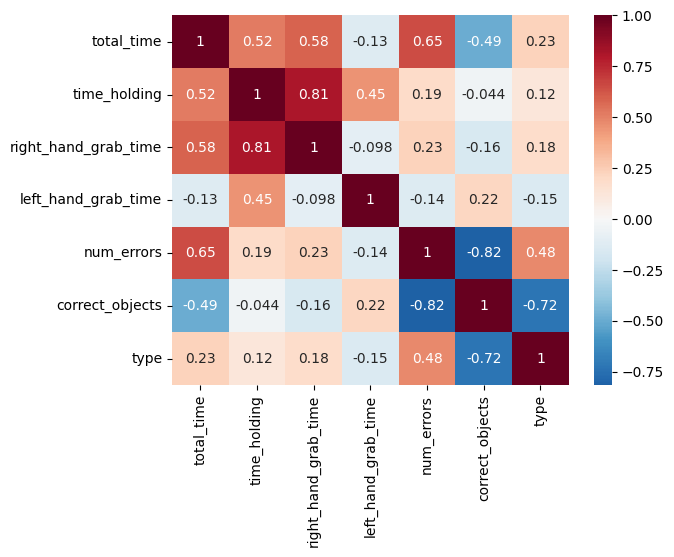

In [37]:
#Correlation heatmap of the varialbes of data_ShoppingTask
corr = data_PairMatchingTask[['total_time','time_holding','right_hand_grab_time','left_hand_grab_time', 'num_errors','correct_objects','type']].corr()
sns.heatmap(corr, xticklabels=corr.columns.values,  yticklabels=corr.columns.values, cmap='RdBu_r', center=0, annot=True)

### Lay table task

<Axes: >

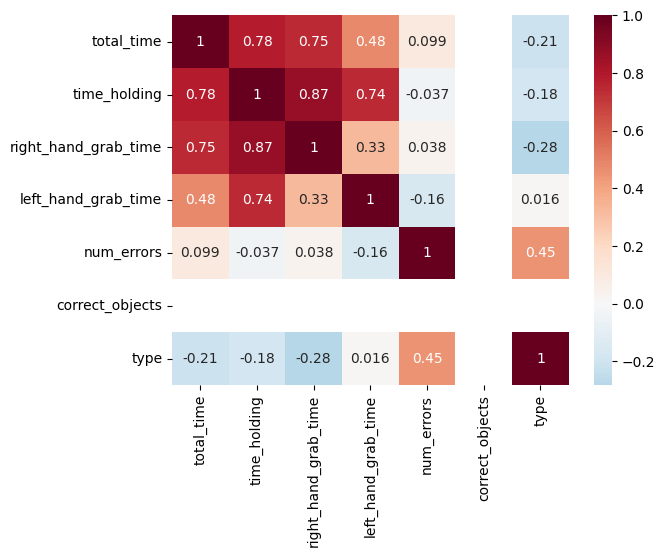

In [38]:
#Correlation heatmap of the varialbes of data_ShoppingTask
corr = data_LayTableTask[['total_time','time_holding','right_hand_grab_time','left_hand_grab_time', 'num_errors','correct_objects','type']].corr()
sns.heatmap(corr, xticklabels=corr.columns.values,  yticklabels=corr.columns.values, cmap='RdBu_r', center=0, annot=True)

## Applying a PCA to the data

### Shopping task

In [49]:
import nbformat
#Aply tsne to the data_ShoppingTask dataframe
tsne = TSNE(n_components=3, random_state=0, init='pca', perplexity=10, learning_rate='auto', n_iter=1000, verbose=1)
tsne_obj = tsne.fit_transform(data_ShoppingTask[['total_time','time_holding','right_hand_grab_time','left_hand_grab_time', 'num_errors','correct_objects']])
tsne_obj = pandas.DataFrame(tsne_obj, columns=['x','y','z'])
fig = px.scatter_3d(tsne_obj, x='x', y='y', z='z', color=data_ShoppingTask['type'], hover_data=[data_ShoppingTask['task_id']], color_continuous_scale='Picnic')
fig.update_layout(title='TSNE of the Shopping task')
fig.update_layout(width=1000, height=500)
fig.show()


[t-SNE] Computing 22 nearest neighbors...
[t-SNE] Indexed 23 samples in 0.000s...
[t-SNE] Computed neighbors for 23 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 23 / 23
[t-SNE] Mean sigma: 47.841699
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.795380
[t-SNE] KL divergence after 1000 iterations: 0.544577


In [50]:
#Test tsne with 2 components
tsne = TSNE(n_components=2, random_state=0, init='pca', perplexity=10, learning_rate='auto', n_iter=1000, verbose=1)
tsne_obj = tsne.fit_transform(data_ShoppingTask[['total_time','time_holding','right_hand_grab_time','left_hand_grab_time', 'num_errors','correct_objects']])
tsne_obj = pandas.DataFrame(tsne_obj, columns=['x','y'])
#Select color palette with big contrast between extremes
fig = px.scatter(tsne_obj, x='x', y='y', color=data_ShoppingTask['type'], hover_data=[data_ShoppingTask['task_id']], color_continuous_scale='Picnic')
fig.update_layout(title='TSNE of the Shopping task')
fig.update_layout(width=1000, height=500)
fig.show()

[t-SNE] Computing 22 nearest neighbors...
[t-SNE] Indexed 23 samples in 0.000s...
[t-SNE] Computed neighbors for 23 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 23 / 23
[t-SNE] Mean sigma: 47.841699
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.354446
[t-SNE] KL divergence after 1000 iterations: 0.034630


### Pairing task

In [51]:
#Aply tsne to the data_ShoppingTask dataframe
tsne = TSNE(n_components=3, random_state=0, init='pca', perplexity=10, learning_rate='auto', n_iter=1000, verbose=1)
tsne_obj = tsne.fit_transform(data_PairMatchingTask[['total_time','time_holding','right_hand_grab_time','left_hand_grab_time', 'num_errors','correct_objects']])
tsne_obj = pandas.DataFrame(tsne_obj, columns=['x','y','z'])
fig = px.scatter_3d(tsne_obj, x='x', y='y', z='z', color=data_PairMatchingTask['type'], hover_data=[data_PairMatchingTask['task_id']], color_continuous_scale='Picnic')
fig.update_layout(width=1000, height=500)
fig.update_layout(title='TSNE of the Pair matching task')
fig.show()


[t-SNE] Computing 22 nearest neighbors...
[t-SNE] Indexed 23 samples in 0.000s...
[t-SNE] Computed neighbors for 23 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 23 / 23
[t-SNE] Mean sigma: 26.530998
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.878578
[t-SNE] KL divergence after 1000 iterations: 0.582668


In [52]:
#Test tsne with 2 components
tsne = TSNE(n_components=2, random_state=0, init='pca', perplexity=10, learning_rate='auto', n_iter=1000, verbose=1)
tsne_obj = tsne.fit_transform(data_PairMatchingTask[['total_time','time_holding','right_hand_grab_time','left_hand_grab_time', 'num_errors','correct_objects']])
tsne_obj = pandas.DataFrame(tsne_obj, columns=['x','y'])
fig = px.scatter(tsne_obj, x='x', y='y', color=data_PairMatchingTask['type'], hover_data=[data_PairMatchingTask['task_id']], color_continuous_scale='Picnic')
fig.update_layout(title='TSNE of the Shopping task')
fig.update_layout(width=1000, height=500)
fig.show()

[t-SNE] Computing 22 nearest neighbors...
[t-SNE] Indexed 23 samples in 0.000s...
[t-SNE] Computed neighbors for 23 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 23 / 23
[t-SNE] Mean sigma: 26.530998
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.584816
[t-SNE] KL divergence after 900 iterations: 0.077936


### Lay table task

In [53]:
#Aply tsne to the data_ShoppingTask dataframe
tsne = TSNE(n_components=3, random_state=0, init='pca', perplexity=10, learning_rate='auto', n_iter=1000, verbose=1)
tsne_obj = tsne.fit_transform(data_LayTableTask[['total_time','time_holding','right_hand_grab_time','left_hand_grab_time', 'num_errors','correct_objects']])
tsne_obj = pandas.DataFrame(tsne_obj, columns=['x','y','z'])
fig = px.scatter_3d(tsne_obj, x='x', y='y', z='z', color=data_LayTableTask['type'], hover_data=[data_LayTableTask['task_id']], color_continuous_scale='Picnic')
fig.update_layout(title='TSNE of the Lay table task')
fig.update_layout(width=1000, height=500)
fig.show()

[t-SNE] Computing 17 nearest neighbors...
[t-SNE] Indexed 18 samples in 0.000s...
[t-SNE] Computed neighbors for 18 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 18 / 18
[t-SNE] Mean sigma: 49.675443
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.073364
[t-SNE] KL divergence after 1000 iterations: 0.767830


In [54]:
#Test tsne with 2 components
tsne = TSNE(n_components=2, random_state=0, init='pca', perplexity=10, learning_rate='auto', n_iter=1000, verbose=1)
tsne_obj = tsne.fit_transform(data_LayTableTask[['total_time','time_holding','right_hand_grab_time','left_hand_grab_time', 'num_errors','correct_objects']])
tsne_obj = pandas.DataFrame(tsne_obj, columns=['x','y'])
fig = px.scatter(tsne_obj, x='x', y='y', color=data_LayTableTask['type'], hover_data=[data_LayTableTask['task_id']], color_continuous_scale='Picnic')
fig.update_layout(title='TSNE of the Shopping task')
fig.update_layout(width=1000, height=500)
fig.show()

[t-SNE] Computing 17 nearest neighbors...
[t-SNE] Indexed 18 samples in 0.001s...
[t-SNE] Computed neighbors for 18 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 18 / 18
[t-SNE] Mean sigma: 49.675443
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.151985
[t-SNE] KL divergence after 1000 iterations: 0.129171
